<a href="https://colab.research.google.com/github/yatindma/Automated-Response-Suggestion-for-Email/blob/master/Smart_Gmail_Reply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Overview </h2>


Here we'll try to predict the Short email responses.<br>
As most of the emails have shorter replies.<br>
So that it can be easy to reply, without the hassle of typing.<br>
It can help in saving the time of the person.<br>

########################################################

Will update later.
########################################################


[my kilnkn](www.com)




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Reading the data </h4>

In [0]:
data = pd.read_csv('qa_dataset.csv', encoding = "ISO-8859-1", low_memory=False) 

In [56]:
data.head(2)

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Alessandro_Volta,Was Volta an Italian physicist?,yes,easy,easy,data/set4/a10
1,Alessandro_Volta,Is Volta buried in the city of Pittsburgh?,no,easy,easy,data/set4/a10


In [57]:
type(data)

pandas.core.frame.DataFrame

<h4>convert data into lower case</h4>

In [58]:
data = data.apply(lambda x: x.astype(str).str.lower())
data.head(4)

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,alessandro_volta,was volta an italian physicist?,yes,easy,easy,data/set4/a10
1,alessandro_volta,is volta buried in the city of pittsburgh?,no,easy,easy,data/set4/a10
2,alessandro_volta,did volta have a passion for the study of elec...,yes,easy,medium,data/set4/a10
3,alessandro_volta,what is the battery made by volta credited to be?,the first cell,medium,medium,data/set4/a10


In [0]:
#Remove the full stops from the dataframe answers

bad_chars = [';', ':', '!', "*",'.',')','(','?']

preprocessed_answers = []
for answer in data['Answer'].values:
  for i in bad_chars : 
    answer = answer.replace(i, '')
  preprocessed_answers.append(answer)



In [0]:
data['Answer'] = preprocessed_answers

In [0]:
#trimming the string the dataframe  
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [0]:
answers_list = list(data['Answer'].values)
answers_dict = {i:answers_list.count(i) for i in answers_list}

In [0]:
from collections import OrderedDict
answers_dict_sorted = OrderedDict(sorted(answers_dict.items(), key=lambda x: x[1]))

In [0]:
answers = []
keys = []
for item in answers_dict_sorted.items():
  answers.append(item[0])
  keys.append(item[1])

In [0]:
answers.reverse()
keys.reverse()

In [0]:
#top 10 answers
top_10_answers = answers[:10]
top_10_keys = keys[:10]

In [0]:
temp_answer_list = []
i = 0
for key in top_10_keys:
  for _ in range(0,key):
    temp_answer_list.append(top_10_answers[i])
  i += 1

<b>
Article title can be used while giving the sentence for tokenizing later 
Question do we need to preprocess the data
Answer mai kitne repeated h
</b>


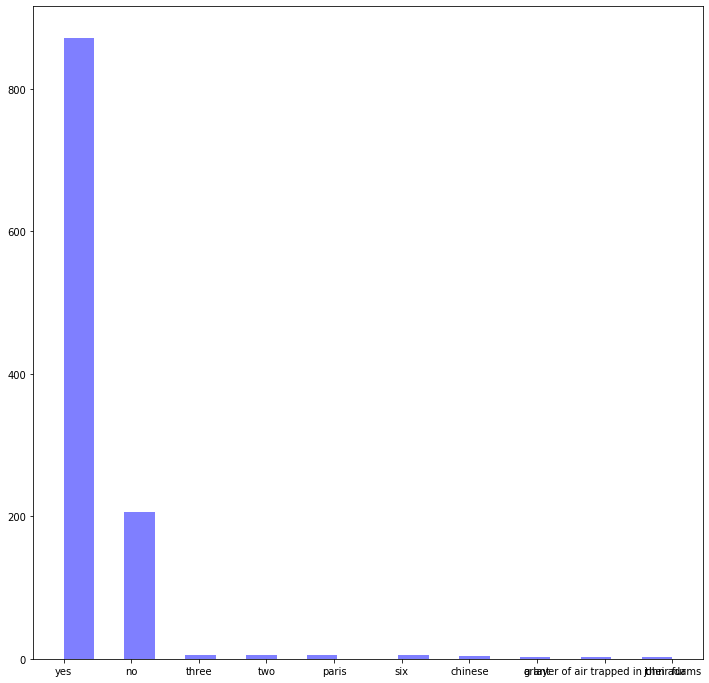

In [131]:
plt.hist(temp_answer_list, 20,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
fig_size = [1,2]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()

from the above graph we can observe that 
yes and no is the most common answers in the mails 

<b>Get the data to Visulize and preprocess it.<b>

In [0]:


# data = pd.read_csv('qa_dataset.csv')